<a href="https://colab.research.google.com/github/pranay2281/ML-Projects/blob/main/Tensorflow/Image%20Recognition/Dogs%20and%20Cats/data_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pranaymatalia","key":"90ec0f6afa72ba836aff5300e0b9ebae"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:16<00:00, 66.8MB/s]
100% 812M/812M [00:16<00:00, 51.8MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [ ]:
import os, shutil
os.makedirs('cats_vs_dogs_small/train/cat/')
os.makedirs('cats_vs_dogs_small/train/dog/')
os.makedirs('cats_vs_dogs_small/validation/cat/')
os.makedirs('cats_vs_dogs_small/validation/dog/')



In [ ]:
for i in range(1000):
  fname = 'cat.'+str(i)+'.jpg'
  shutil.copyfile(src= 'train/'+fname, dst = 'cats_vs_dogs_small/train/cat/' + fname )

  fname = 'dog.'+str(i)+'.jpg'
  shutil.copyfile(src = 'train/'+fname, dst = 'cats_vs_dogs_small/train/dog/' + fname)

for i in range(1000,2000):
  fname = 'cat.'+str(i)+'.jpg'
  shutil.copyfile(src= 'train/'+fname, dst = 'cats_vs_dogs_small/validation/cat/' + fname )

  fname = 'dog.'+str(i)+'.jpg'
  shutil.copyfile(src = 'train/'+fname, dst = 'cats_vs_dogs_small/validation/dog/' + fname)

In [ ]:
import tensorflow as tf

train_dataset = tf.keras.utils.image_dataset_from_directory('cats_vs_dogs_small/train/', image_size =(180,180), batch_size = 32)
val_dataset = tf.keras.utils.image_dataset_from_directory('cats_vs_dogs_small/validation/', image_size =(180,180), batch_size = 32)

Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
#augmentation

inputs = tf.keras.Input(shape=(180,180,3))
x = tf.keras.layers.RandomRotation(0.1)(inputs)
x = tf.keras.layers.RandomZoom(0.2)(x)
outputs = tf.keras.layers.RandomFlip(mode='horizontal')(x)

data_augmentation = tf.keras.Model(inputs,outputs)


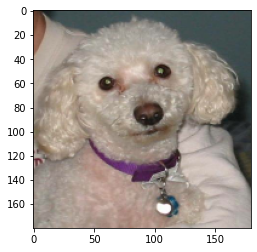

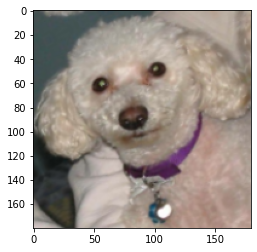

In [ ]:
for image_batch,label_batch in train_dataset:
  image_batch_aug = data_augmentation(image_batch)
  break

img = image_batch[0]
img_aug = image_batch_aug[0]
plt.imshow(img/255)
plt.figure()
plt.imshow(img_aug/255)


In [ ]:
inputs = tf.keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = tf.keras.layers.Rescaling(scale = 1./255.0)(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size = 2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size = 2)(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size = 2)(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size = 2)(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu')(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(rate = 0.5)(x)
#ramdomly sets 50% of output layers to 0; only active during training

outputs = tf.keras.layers.Dense(units = 1 , activation='sigmoid')(x)

model = tf.keras.Model(inputs =inputs, outputs = outputs)





In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(train_dataset,epochs=100,validation_data=val_dataset)


Epoch 1/100
63/63 [==============================] - 7s 88ms/step - loss: 0.8014 - accuracy: 0.5260 - val_loss: 0.6910 - val_accuracy: 0.6095
Epoch 2/100
63/63 [==============================] - 6s 86ms/step - loss: 0.7031 - accuracy: 0.5205 - val_loss: 0.6892 - val_accuracy: 0.5030
Epoch 3/100
63/63 [==============================] - 6s 86ms/step - loss: 0.6934 - accuracy: 0.5515 - val_loss: 0.6685 - val_accuracy: 0.5615
Epoch 4/100
63/63 [==============================] - 6s 86ms/step - loss: 0.6827 - accuracy: 0.6120 - val_loss: 0.6353 - val_accuracy: 0.6425
Epoch 5/100
63/63 [==============================] - 6s 87ms/step - loss: 0.6449 - accuracy: 0.6295 - val_loss: 0.6468 - val_accuracy: 0.6365
Epoch 6/100
63/63 [==============================] - 6s 88ms/step - loss: 0.6602 - accuracy: 0.6610 - val_loss: 0.6055 - val_accuracy: 0.6645
Epoch 7/100
63/63 [==============================] - 6s 91ms/step - loss: 0.5875 - accuracy: 0.6835 - val_loss: 0.6583 - val_accuracy: 0.6365
Epoch 

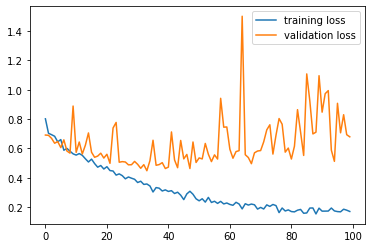

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss,label = 'training loss')
plt.plot(val_loss,label= 'validation loss')
plt.legend()

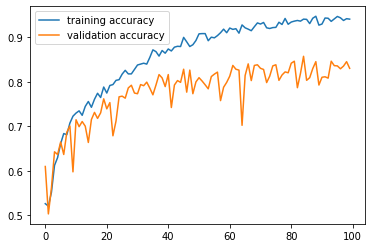

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy,label = 'training accuracy')
plt.plot(val_accuracy,label= 'validation accuracy')
plt.legend()